<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/MLR_Toyota_Corrola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building the Multiple Linear Regression model to predect the price of car

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
toyota = pd.read_csv('/content/Toyoto_Corrola.csv')

In [4]:
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
toyota.tail()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,1,110,5,4,5,1114


In [7]:
toyota.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

#Correlation

In [8]:
toyota.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [ ]:
toyota.drop('Cylinders', axis=0)

#Scatterplot between variable along with histogram

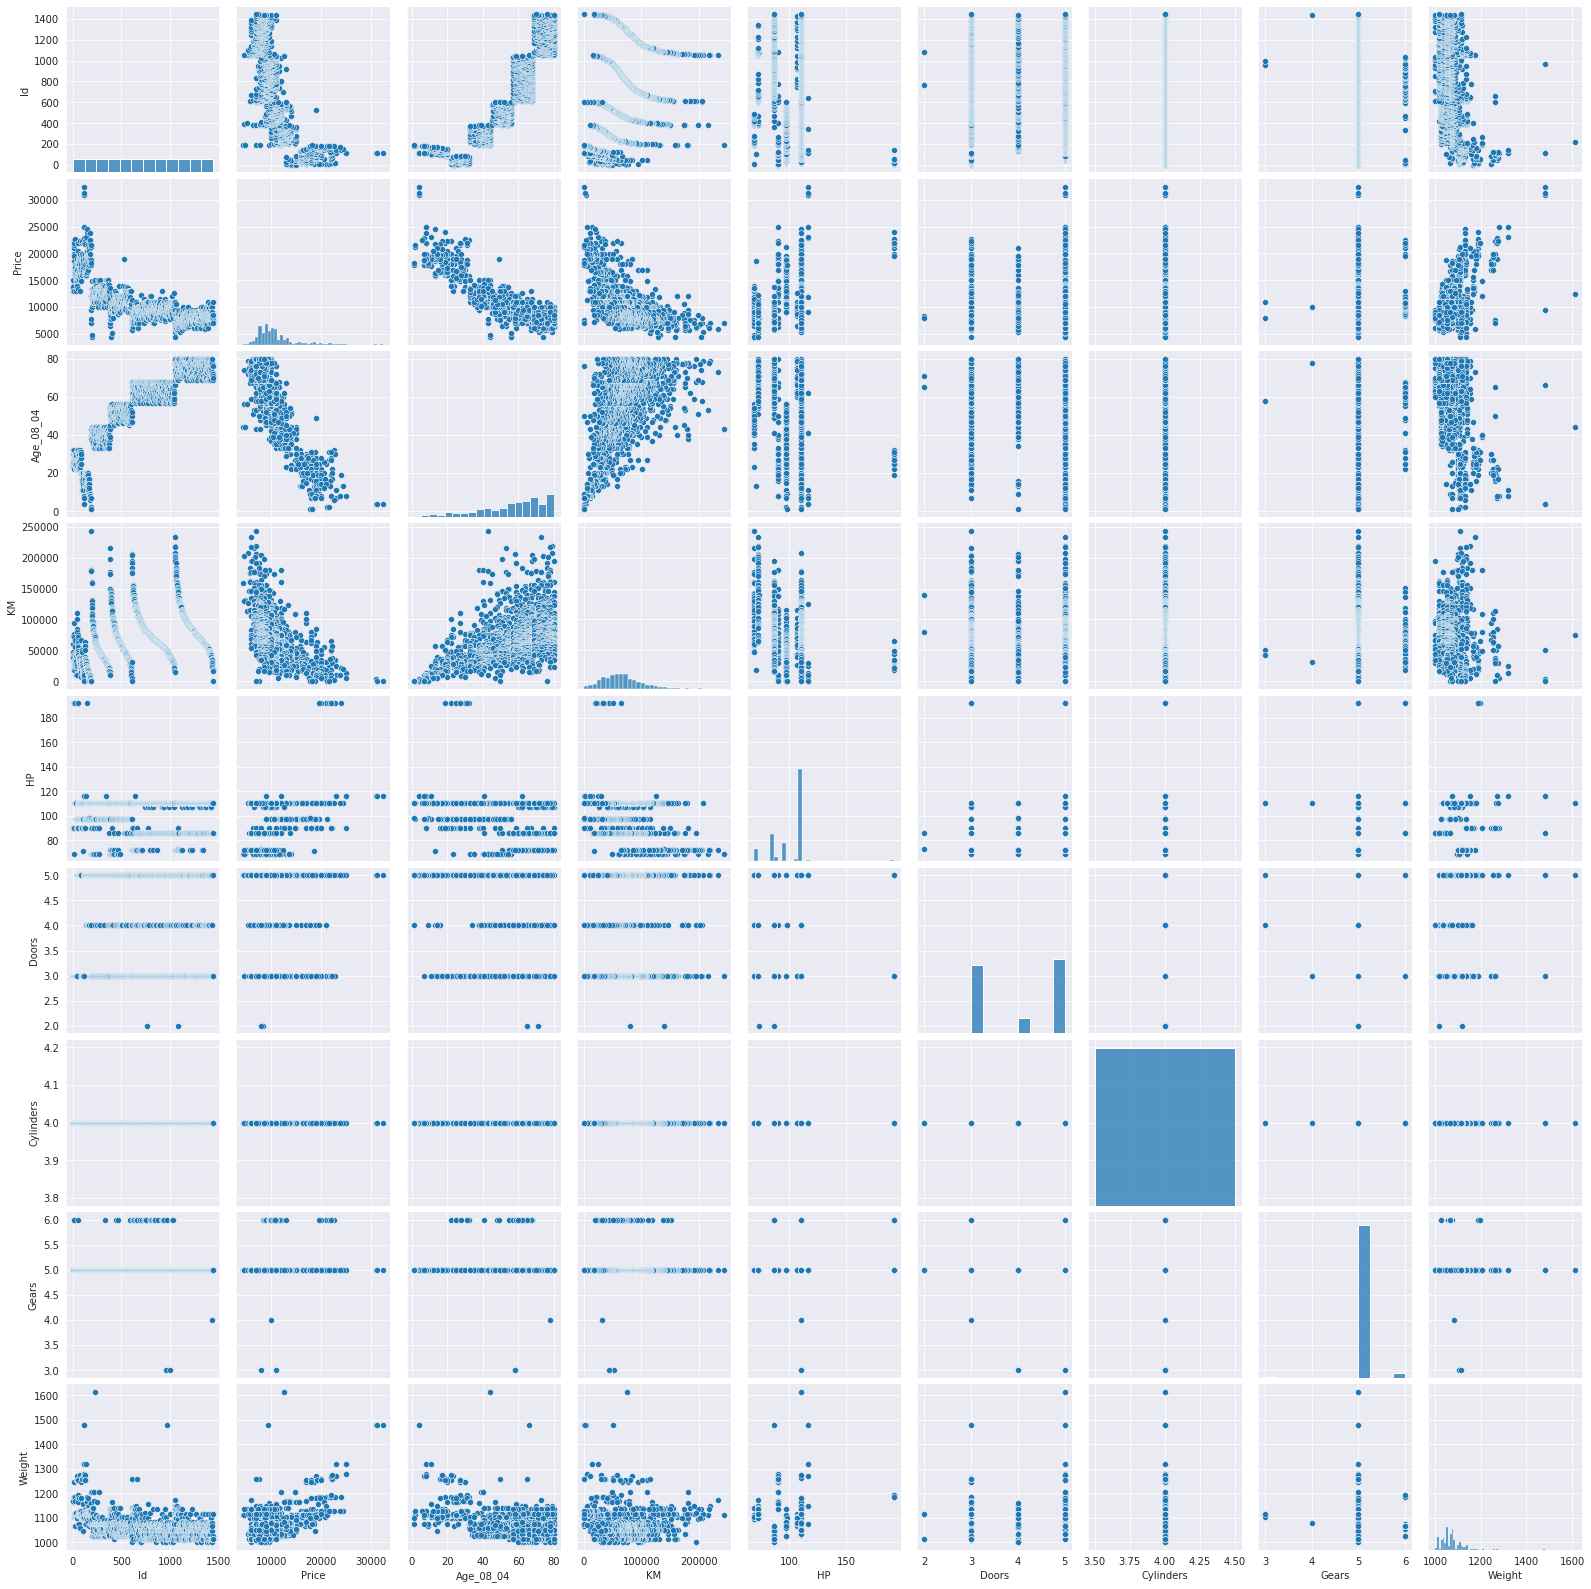

In [9]:
#Format the plot background and scatter plot for all the variable
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

#Preparing a model

In [11]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [28]:
#build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=toyota).fit()

In [29]:
#Coefficients
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [30]:
#tvalue & p-Value
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [31]:
#R Square Values
(model.rsquared, model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

#Calculate VIF

In [34]:
rsq_age = smf.ols("Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight", data=toyota).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols("KM~HP+Doors+Cylinders+Gears+Weight+Age_08_04", data=toyota).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols("HP~KM+Doors+Cylinders+Gears+Weight+Age_08_04", data=toyota).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_doors = smf.ols("Doors~KM+HP+Cylinders+Gears+Weight+Age_08_04", data=toyota).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_cyl = smf.ols("Cylinders~KM+HP+Doors+Gears+Weight+Age_08_04", data=toyota).fit().rsquared
vif_cyl = 1/(1-rsq_cyl)

rsq_gears = smf.ols("Gears~KM+HP+Doors+Cylinders+Weight+Age_08_04", data=toyota).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_wt = smf.ols("Weight~KM+HP+Doors+Cylinders+Gears+Age_08_04", data=toyota).fit().rsquared
vif_wt = 1/(1-rsq_wt)

d1= {'Variables': ['Age_80_04', 'KM', "HP", 'Doors', 'Cylinders', 'Gears', 'Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_doors, vif_cyl, vif_gears, vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Age_80_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


#Residual Analysis

###Test for Normality of Residuals (Q-Q Plot)

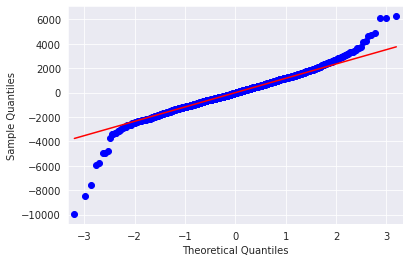

In [35]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line ="q")
plt.show()

In [36]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

#Residual Plot for Homoscedasticity

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def get_standardize_values( vals ):
    return(vals - vals.mean())/vals.std()

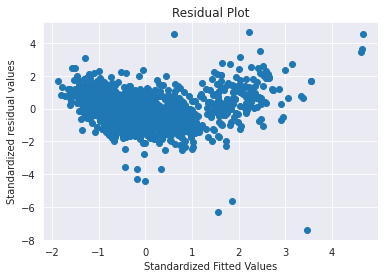

In [39]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

plt.title("Residual Plot")
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressors

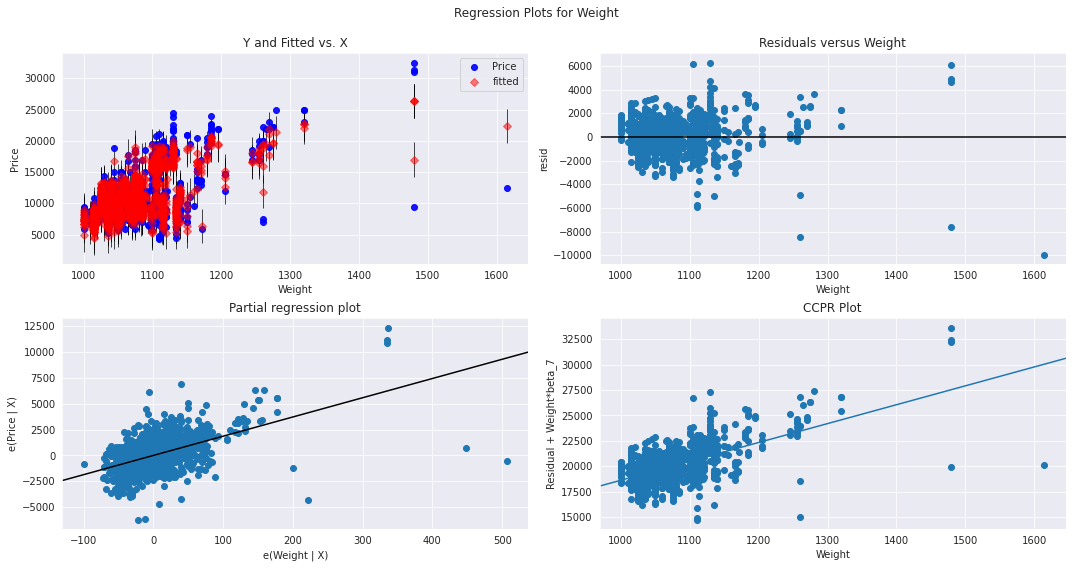

In [43]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

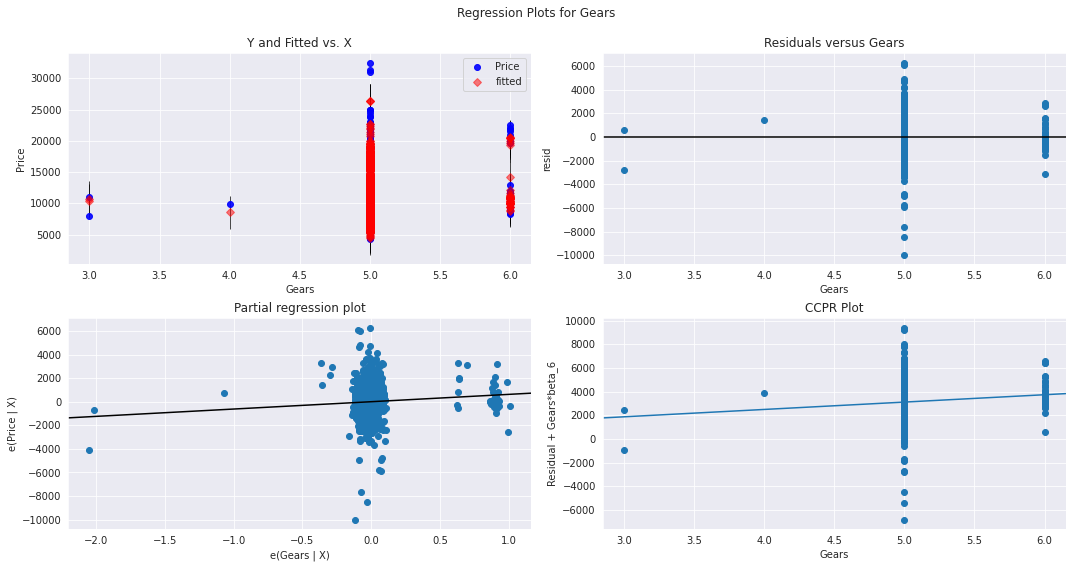

In [44]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

ValueError: ignored

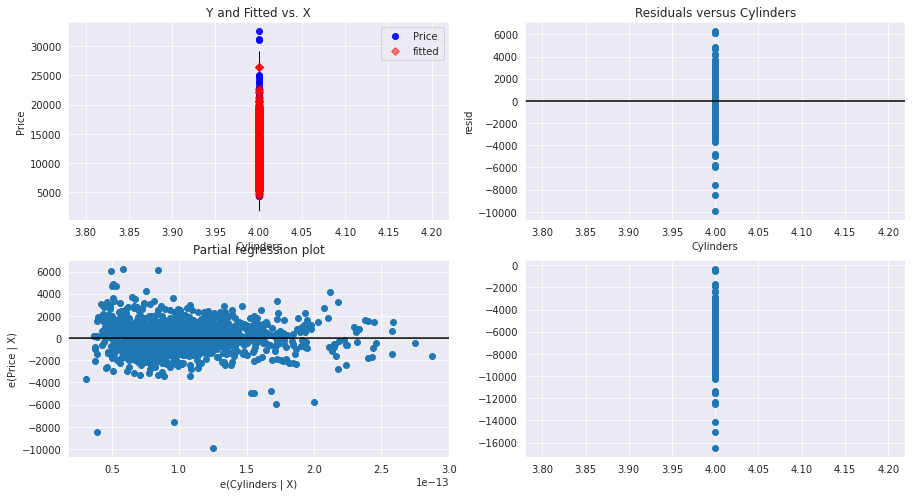

In [45]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinders", fig=fig)
plt.show()

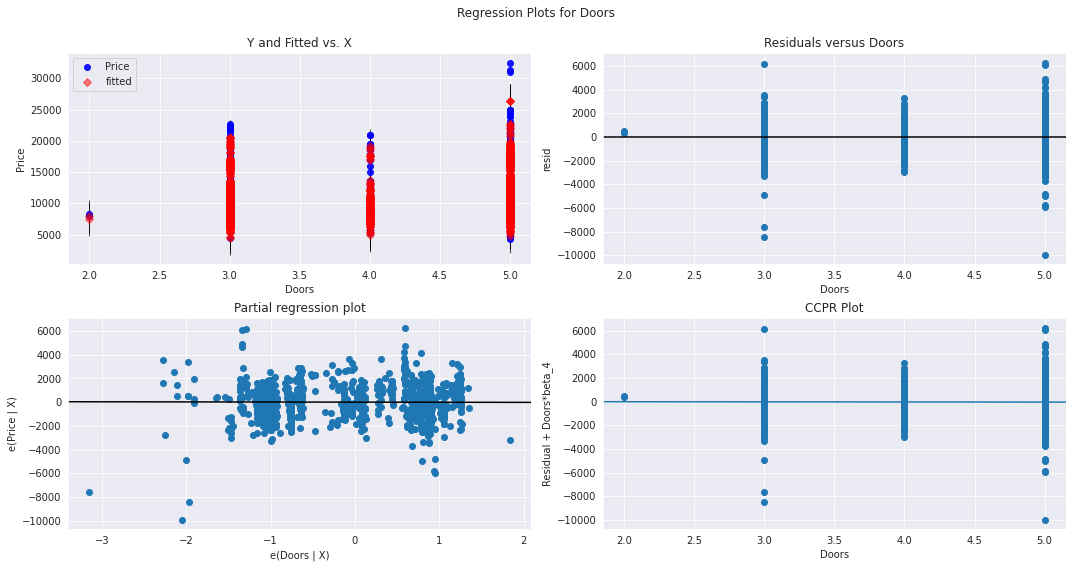

In [46]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

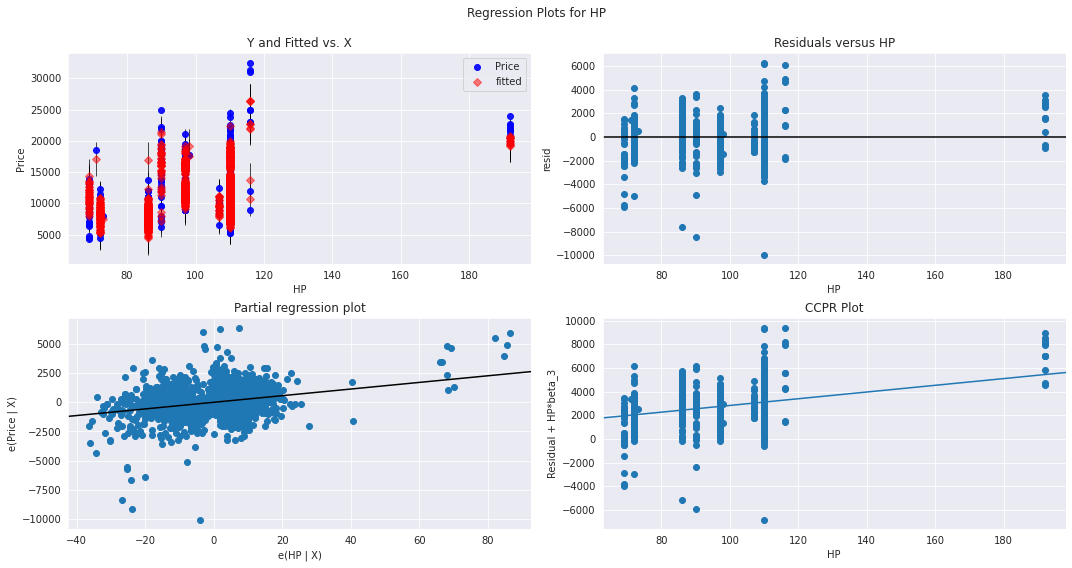

In [47]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

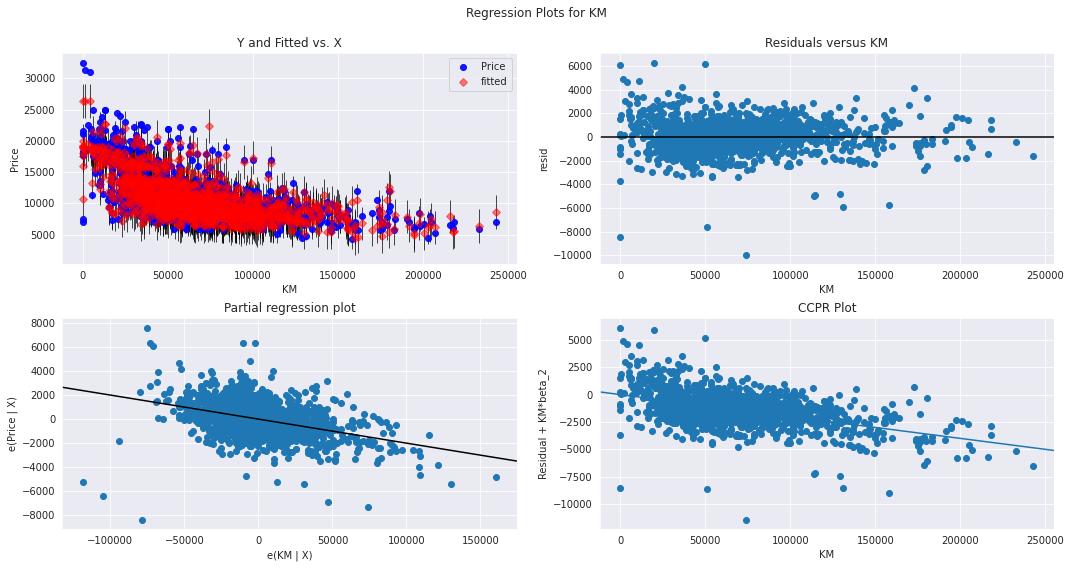

In [48]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

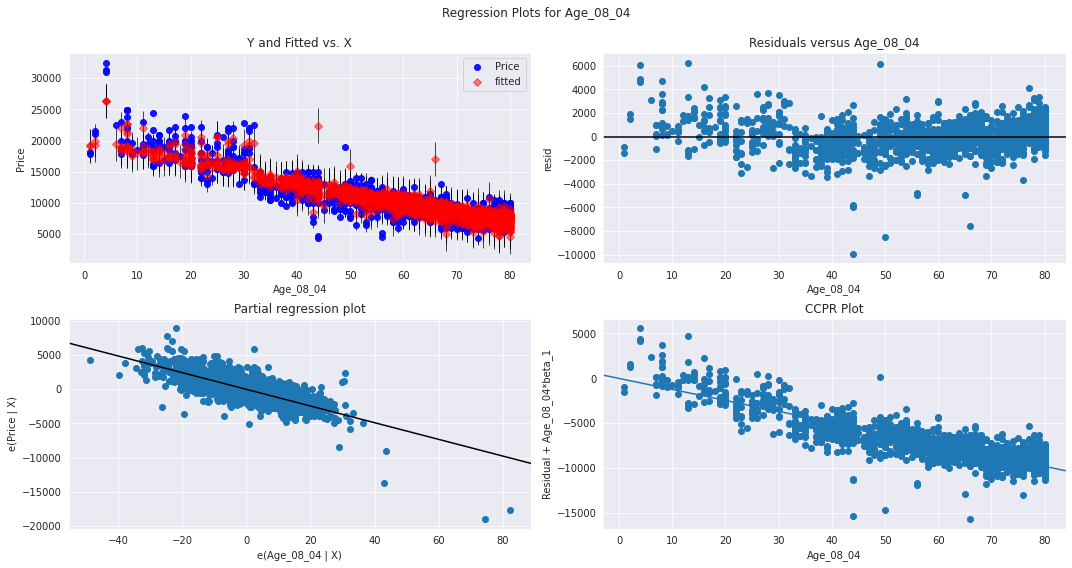

In [49]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

#Model deletion Diagnosistics

###Detecting Influencers/Outliers

In [53]:
import numpy as np

In [50]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


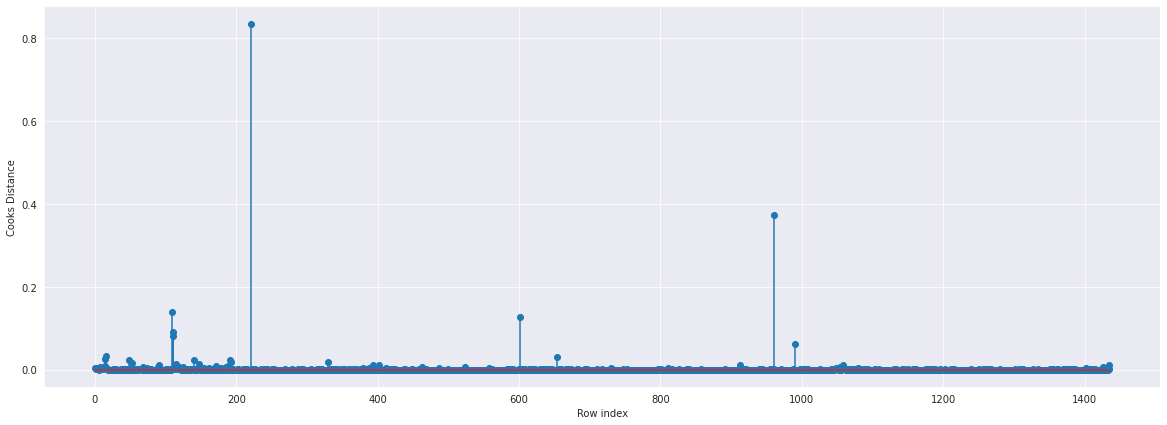

In [56]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
#index and value of influencer where c is mode than .5
#finding the Max value from the data which is outliers, max value is 1.08, 76th observation
(np.argmax(c), np.max(c))

(221, 0.8359007508857416)

#High Influence Point

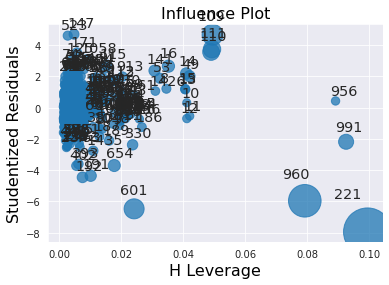

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [59]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [60]:
leverage_cutoff

0.02298050139275766

In [61]:
toyota[toyota.index.isin([960,956,991,221])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
956,960,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,996,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [62]:
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


#Impovind the model


In [68]:
# Load the data
toyota_new = pd.read_csv('Toyoto_Corrola.csv')

In [69]:
#Discard the data point which are influencers and reasign the row number(reset_index())
toyota1 = toyota_new.drop(toyota_new.index[[960,956,991,221]], axis=0).reset_index()

In [70]:
toyota1=toyota1.drop(['index'], axis=1)

In [71]:
toyota1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015
